## Plotting and interpreting Learning Curves ##

The learning curve function in the sklearn.model_selection module:

<b>train_sizes, train_scores,validation_scores</b> = <u>learning_curve(estimator = logreg, X=X,y=y,train_sizes=train_sizes,cv=15,scoring='accuracy')</u>

where, train_sizes = number of samples of training data taken each time. e.g [10,15,20,50....] and the learning curves are plotted with these sample sizes as the x-axis.

cv = the number of partions when using k-fold cross validation

estimator = the model used

scoring = performance evaluation metric (accuracy or MSE....etc.)

In [1]:
# Import modules

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the data 

data = pd.read_csv('classification_data.csv')
data.head()

,Test_1,Test_2,Cancer_Y_N
0,0.295578,1.289804,0
1,0.024831,-0.788522,1
2,0.131159,1.190200,0
3,-0.542544,-0.020009,1
4,0.694037,0.534599,1


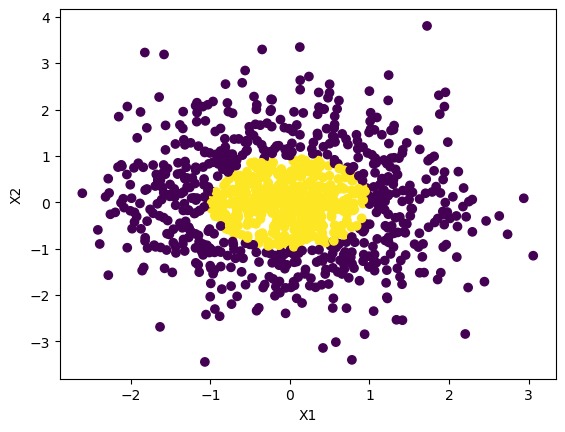

In [3]:
# Plot X vs y

plt.scatter(data['Test_1'],data['Test_2'],c=data['Cancer_Y_N'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [4]:
# Separate X,y

feature_cols = list(data.columns[:-1])

X = data[feature_cols]
y = data['Cancer_Y_N']
X = X

X.shape,y.shape

((1000, 2), (1000,))

In [5]:
# Check how many 1s and 0s are there
print(f"1 and 0s:\n{y.value_counts()}")

1 and 0s:
0    597
1    403
Name: Cancer_Y_N, dtype: int64


In [6]:
# Split the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)
print(X_train.shape,y_test.shape)
print(f"\n1 and 0s in test set:\n{y_test.value_counts()}")

(850, 2) (150,)

1 and 0s in test set:
0    92
1    58
Name: Cancer_Y_N, dtype: int64


In [7]:
# Instantiate regression object

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print(f"Accuracy: {accuracy_score(y_pred,y_test)*100}%")
print(f"Confusion Matrix:\n{confusion_matrix(y_pred,y_test)}")

Accuracy: 61.33333333333333%
Confusion Matrix:
[[92 58]
 [ 0  0]]


[-0.38084378] [[ 0.01148831 -0.01911077]]
[33.15055076] [-19.92822617]


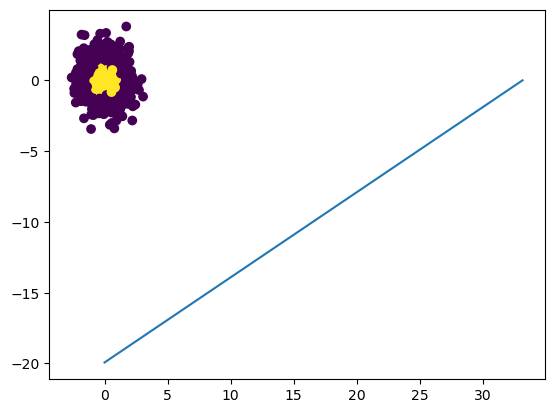

In [8]:
# plot Decision Boundary to see how the fit is
# theta0 + theta1*x1 + theta2*x2 >= 0 for y = 1
print(logreg.intercept_,logreg.coef_)

# Formulate the equations and get the two coordinates
x1 = -logreg.intercept_/logreg.coef_[0][0] # When x2=0
x2 = -logreg.intercept_/logreg.coef_[0][1] # When x1=0
print(x1,x2)

plt.scatter(X['Test_1'],X['Test_2'],c=y)
plt.plot([np.squeeze(x1),0],[0,np.squeeze(x2)])
plt.show()

In [9]:
# Plot learning curves for cv= 5

train_sizes = [50,100,300,500,700] # Creating the sample sizes

# Prepare to plot the learning curves for the new data set using cv = 15
train_sizes, train_scores, validation_scores = learning_curve(
estimator = logreg,
X= X,
y= y, train_sizes = train_sizes, cv = 15,
scoring = 'accuracy')

In [10]:
# Print average accuracy for train and validation data per cv iteration

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[0.52       0.56       0.56       0.56       0.56       0.56
  0.56       0.56       0.56       0.56       0.56       0.56
  0.56       0.56       0.56      ]
 [0.64       0.64       0.52       0.52       0.52       0.52
  0.52       0.52       0.52       0.52       0.52       0.52
  0.52       0.52       0.52      ]
 [0.61333333 0.61333333 0.61333333 0.61333333 0.61333333 0.61
  0.61       0.61       0.61       0.61       0.61       0.61
  0.61       0.61       0.61      ]
 [0.616      0.616      0.616      0.616      0.616      0.616
  0.616      0.616      0.612      0.612      0.612      0.612
  0.612      0.612      0.612     ]
 [0.60428571 0.60428571 0.60428571 0.60428571 0.60428571 0.60428571
  0.60428571 0.60428571 0.60428571 0.60428571 0.60428571 0.6
  0.6        0.6        0.6       ]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.52238806 0.52238806 0.35820896 0.34328358 0.41791045 0.56716418
  0.388059

In [11]:
# Store the mean values of accuracy per iteration

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 50     0.557333
100    0.536000
300    0.611111
500    0.614133
700    0.603143
dtype: float64

 --------------------

Mean validation scores

 50     0.442967
100    0.478969
300    0.597000
500    0.597000
700    0.597000
dtype: float64


(0.0, 1.0)

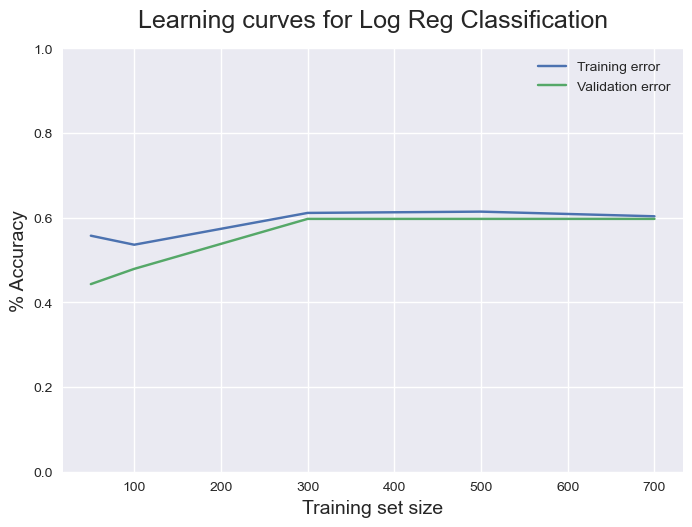

In [12]:
# Plot learning curves

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('% Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Log Reg Classification', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1)

#### What does the training curve tell us? ####
1. What action should we take?

Answers
1. Bias is high and variance is low
2. The data is already converging, so adding data has no value. 
3. We either need to do some feature engineering or add a new measurement to the dataset



In [14]:
# Lets add some polynomial features

from sklearn.preprocessing import PolynomialFeatures

In [15]:
# Let us now add polynomial features after instantiating an object to do the same

poly = PolynomialFeatures(2,interaction_only=False,include_bias=False)
X_new = poly.fit_transform(X)

print(f"New X:\n{X_new[:5]}")

New X:
[[ 2.95577774e-01  1.28980437e+00  8.73662205e-02  3.81237503e-01
   1.66359530e+00]
 [ 2.48313740e-02 -7.88522054e-01  6.16597135e-04 -1.95800860e-02
   6.21767030e-01]
 [ 1.31159293e-01  1.19019993e+00  1.72027601e-02  1.56105782e-01
   1.41657588e+00]
 [-5.42543870e-01 -2.00090420e-02  2.94353851e-01  1.08557831e-02
   4.00361762e-04]
 [ 6.94037007e-01  5.34598760e-01  4.81687367e-01  3.71031323e-01
   2.85795834e-01]]


In [16]:
# Let us build a model with the new X

logreg1 = LogisticRegression()

X_train1,X_test1,y_train1,y_test1 = train_test_split(X_new,y,test_size=0.15,random_state=42)

logreg1.fit(X_train1[:,2:5],y_train1)
y_hat = logreg1.predict(X_test1[:,2:5]).reshape(-1,1)
print(y_hat.shape,X_test1[:,2:5].shape)
print(f"Accuracy: {accuracy_score(y_hat,y_test1)*100}%")
print(f"Confusion Matrix:\n{confusion_matrix(y_hat,y_test1)}")

(150, 1) (150, 3)
Accuracy: 98.0%
Confusion Matrix:
[[89  0]
 [ 3 58]]
